# Mean Construction Document

In [19]:
#Read packages into R
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

In [20]:
#reading the dataset and shortening the column names
pulsar_base_data = read_csv("https://raw.githubusercontent.com/NicoRui/DSCI_100_Project/main/pulsar_data_train.csv", skip = 1,
                            col_names = c("mean_prof", "sd_prof", 
                                          "kurt_prof", "skew_prof", "mean_DMSNR",
                                          "sd_DMSNR","kurt_DMSNR","skew_DMSNR", "target_class")) %>% 
                    mutate(target_class = as_factor(target_class)) %>% 
                    mutate(target_class = fct_recode(target_class,
                                                    "non_pulsar" = '0',
                                                    "pulsar" = '1')) 
           
head(pulsar_base_data)

Parsed with column specification:
cols(
  mean_prof = col_double(),
  sd_prof = col_double(),
  kurt_prof = col_double(),
  skew_prof = col_double(),
  mean_DMSNR = col_double(),
  sd_DMSNR = col_double(),
  kurt_DMSNR = col_double(),
  skew_DMSNR = col_double(),
  target_class = col_double()
)



mean_prof,sd_prof,kurt_prof,skew_prof,mean_DMSNR,sd_DMSNR,kurt_DMSNR,skew_DMSNR,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
121.15625,48.37297,0.3754847,-0.01316549,3.168896,18.39937,7.449874,65.159298,non_pulsar
76.96875,36.17556,0.7128979,3.38871856,2.399666,17.57100,9.414652,102.722975,non_pulsar
130.58594,53.22953,0.1334083,-0.29724164,2.743311,22.36255,8.508364,74.031324,non_pulsar
156.39844,48.86594,-0.2159886,-0.17129365,17.471572,NA,2.958066,7.197842,non_pulsar
84.80469,36.11766,0.8250128,3.27412537,2.790134,20.61801,8.405008,76.291128,non_pulsar
121.00781,47.17694,0.2297081,0.09133623,2.036789,NA,9.546051,112.131721,non_pulsar


In [21]:
set.seed(632)
pulsar_split = initial_split(pulsar_base_data, prop = 0.8, strata = target_class)
pulsar_train = training(pulsar_split)
pulsar_test = testing(pulsar_split)
print("Table 1 - Training Data")
head(pulsar_train)
print("Table 2 - Testing Data")
head(pulsar_test)


[1] "Table 1 - Training Data"


mean_prof,sd_prof,kurt_prof,skew_prof,mean_DMSNR,sd_DMSNR,kurt_DMSNR,skew_DMSNR,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
121.15625,48.37297,0.3754847,-0.01316549,3.168896,18.39937,7.4498741,65.159298,non_pulsar
76.96875,36.17556,0.7128979,3.38871856,2.399666,17.57100,9.4146523,102.722975,non_pulsar
130.58594,53.22953,0.1334083,-0.29724164,2.743311,22.36255,8.5083638,74.031324,non_pulsar
84.80469,36.11766,0.8250128,3.27412537,2.790134,20.61801,8.4050084,76.291128,non_pulsar
121.00781,47.17694,0.2297081,0.09133623,2.036789,NA,9.5460511,112.131721,non_pulsar
79.34375,42.40217,1.0634129,2.24437669,141.641304,NA,-0.7008088,-1.200653,non_pulsar


[1] "Table 2 - Testing Data"


mean_prof,sd_prof,kurt_prof,skew_prof,mean_DMSNR,sd_DMSNR,kurt_DMSNR,skew_DMSNR,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
156.3984,48.86594,-0.21598860,-0.17129365,17.471572,NA,2.958066,7.197842,non_pulsar
83.9375,45.71272,0.74877682,1.34290171,1.747492,12.07058,11.838557,NA,non_pulsar
111.7109,46.57054,0.27286063,-0.06164600,2.139632,16.65571,9.353872,97.733760,non_pulsar
127.3281,45.33954,-0.02866461,-0.20653223,3.955686,26.25178,6.815905,46.623791,non_pulsar
108.7578,47.47084,0.23388338,-0.01183974,3.428930,22.80573,7.431087,58.339075,non_pulsar
117.6797,47.45704,0.21480140,-0.13550329,2.731605,21.99329,8.401669,71.587641,non_pulsar


In [22]:
#Pulsar train and test with no NAs
pulsar_train_noNA = drop_na(pulsar_train)
pulsar_test_noNA = drop_na(pulsar_test)

mean_recipe_train <-recipe(target_class~mean_prof+mean_DMSNR, data = pulsar_train_noNA) %>% 
                    step_upsample(target_class, over_ratio = 1, skip = FALSE) %>%
                    prep()
upsample_mean_train <- bake(mean_recipe_train, pulsar_train_noNA)

final_recipe_train<-recipe(target_class~mean_prof+mean_DMSNR, data = upsample_mean_train) %>%
                    step_scale(all_predictors()) %>% 
                    step_center(all_predictors()) %>% 
                    prep()
final_mean_train<-bake(final_recipe_train, pulsar_train_noNA)
print("Table 3 - Mean training data")
head(final_mean_train)

mean_recipe_test <- recipe(target_class~ mean_prof + mean_DMSNR, data = pulsar_test_noNA) %>% 
                    step_scale(all_predictors()) %>% 
                    step_center(all_predictors()) %>%
                    prep()
scaled_mean_test <- bake(mean_recipe_test, pulsar_test_noNA)
print("Table 4 - Mean testing data")
head(scaled_mean_test)

[1] "Table 3 - Mean training data"


mean_prof,mean_DMSNR,target_class
<dbl>,<dbl>,<fct>
0.8900741,-0.6281189,non_pulsar
-0.2386530,-0.6459383,non_pulsar
1.1309464,-0.6379777,non_pulsar
-0.0384915,-0.6368930,non_pulsar
0.5899317,-0.6367187,non_pulsar
0.2221375,-0.6373579,non_pulsar


[1] "Table 4 - Mean testing data"


mean_prof,mean_DMSNR,target_class
<dbl>,<dbl>,<fct>
0.01107067,-0.3549535,non_pulsar
0.65083778,-0.2897149,non_pulsar
-0.10990580,-0.3086377,non_pulsar
0.25558396,-0.3336879,non_pulsar
-0.64565876,-0.3022701,non_pulsar
0.13876806,-0.2371817,non_pulsar


In [23]:
set.seed(781)
mean_vfold <- vfold_cv(final_mean_train, v = 5, strata = target_class)

gridvals <- tibble(neighbors = seq(10,60))

knn_mean_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())%>%
set_engine("kknn")%>%
set_mode("classification")

In [24]:
set.seed(781)

mean_fit <- workflow()%>%
add_recipe(final_recipe_train)%>%
add_model(knn_mean_spec)%>%
tune_grid(resamples = mean_vfold, grid = gridvals)%>%
collect_metrics()

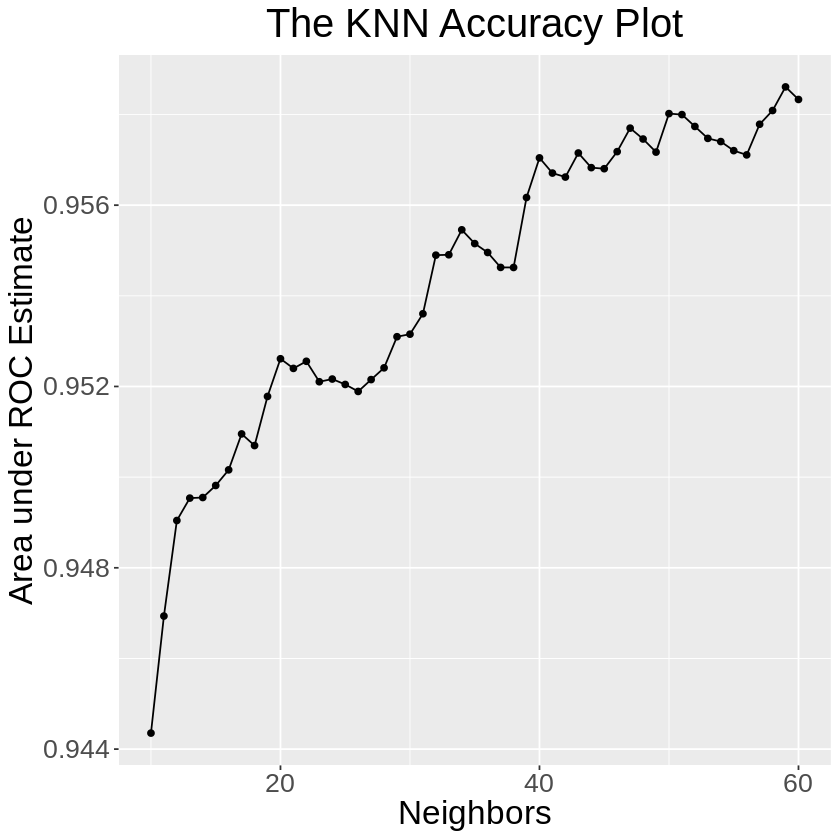

In [25]:
meanFitROC <- filter(mean_fit, .metric == "roc_auc")

ROC_plot <- ggplot(meanFitROC, aes( x = neighbors, y = mean))+
geom_point()+
geom_line()+
labs(x = "Neighbors", y = "Area under ROC Estimate", title = "The KNN Accuracy Plot")+
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))
ROC_plot

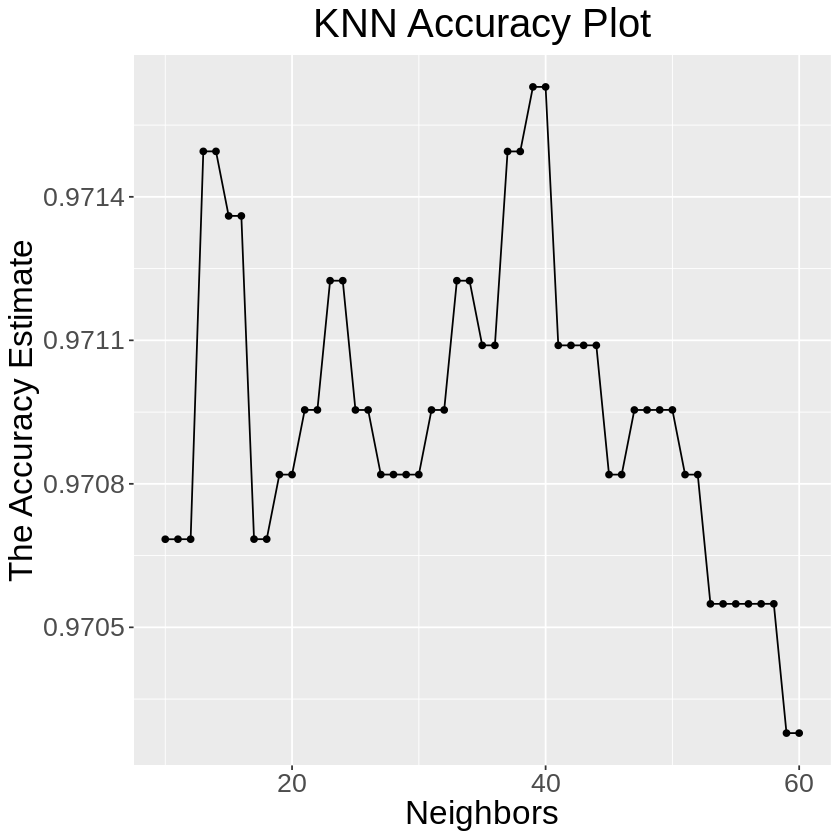

In [26]:
meanFitAccuracy <- filter(mean_fit, .metric == "accuracy")

accuracy_plot <- ggplot(meanFitAccuracy, aes(x = neighbors, y = mean))+
geom_point()+
geom_line()+
labs(x = "Neighbors", y = "The Accuracy Estimate", title = "KNN Accuracy Plot")+
theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20))
accuracy_plot

In [27]:
BestK <- meanFitROC%>%
arrange(desc(mean))%>%
slice(1)
BestK

BestKaccuracy <- meanFitAccuracy %>%
arrange(desc(mean))%>%
slice(1)
BestKaccuracy

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
59,roc_auc,binary,0.9586085,5,0.006615147,Model50


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
39,accuracy,binary,0.9716298,5,0.001507781,Model30
